In [15]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
House= pd.read_csv("C:\\Users\\manjunath.d\\Desktop\\Research gate\\House.csv")

In [3]:
House.head()

,sqft,price
0,1450,6300000
1,2190,11500000
2,1019,3800000
3,1857,10500000
4,2190,11500000


In [4]:
House.describe()

,sqft,price
count,3500.000000,3.500000e+03
mean,1538.163143,8.067807e+06
std,416.264178,4.984973e+06
min,1019.000000,3.800000e+06
25%,1200.000000,4.800000e+06
50%,1543.000000,6.600000e+06
75%,1784.000000,1.050000e+07
max,4856.000000,4.750000e+07


In [8]:
House.shape

(3500, 2)

In [9]:
House.columns

Index(['sqft', 'price'], dtype='object')

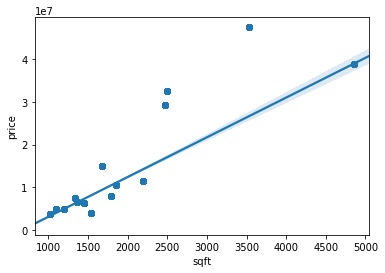

In [16]:
sns.regplot(x="sqft", y="price", data=House);

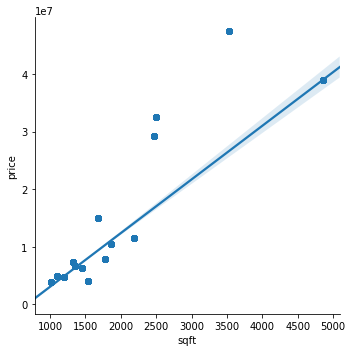

In [17]:
sns.lmplot(x="sqft", y="price", data=House);

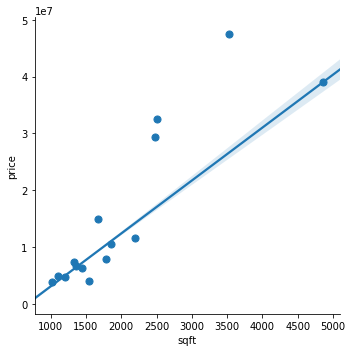

In [18]:
sns.lmplot(x="sqft", y="price", data=House, x_estimator=np.mean);

<function matplotlib.pyplot.show(*args, **kw)>

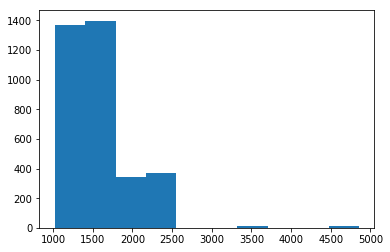

In [19]:
plt.hist(House.sqft)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

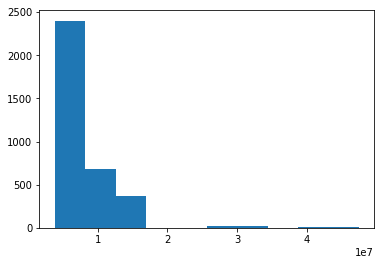

In [20]:
plt.hist(House.price)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

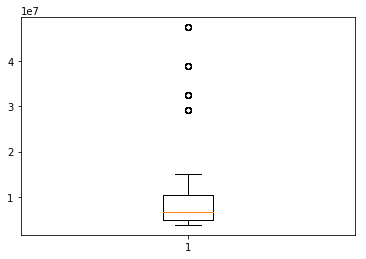

In [21]:
plt.boxplot(House.price)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

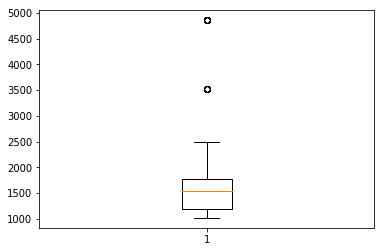

In [22]:
plt.boxplot(House.sqft)
plt.show

In [23]:
House.sqft.corr(House.price)

0.7783641177270513

In [24]:
import statsmodels.formula.api as smf

In [25]:
model = smf.ols("sqft ~ price", data = House).fit()

In [26]:
model.params

Intercept    1013.785089
price           0.000065
dtype: float64

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   sqft   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     5377.
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        12:13:13   Log-Likelihood:                -24446.
No. Observations:                3500   AIC:                         4.890e+04
Df Residuals:                    3498   BIC:                         4.891e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1013.7851      8.406    120.604      0.000     997.304    1030.266
price         6.5e-05   8.86e-07     73.327      0.000    6.33e-05    6.67e-05
==============================================================================
Omnibus:                      181.631   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.187
Skew:                           0.549   Prob(JB):                     1.14e-47
Kurtosis:                       3.526   Cond. No.                     1.80e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
model.conf_int(0.05)

,0,1
Intercept,997.304107,1030.266070
price,0.000063,0.000067


In [37]:
pred= model.predict(House)
pred

0       1423.262123
1       1761.243167
2       1260.771236
3       1696.246812
4       1761.243167
5       1988.730408
6       1491.508295
7       1988.730408
8       1696.246812
9       1332.267226
10      1260.771236
11      1260.771236
12      1988.730408
13      1275.395416
14      1275.395416
15      1325.767591
16      1696.246812
17      1527.256290
18      1275.395416
19      1491.508295
20      1761.243167
21      1696.246812
22      1332.267226
23      1988.730408
24      1260.771236
25      1332.267226
26      1491.508295
27      1275.395416
28      1325.767591
29      1423.262123
           ...     
3470    1260.771236
3471    1423.262123
3472    1491.508295
3473    1260.771236
3474    1491.508295
3475    1423.262123
3476    1260.771236
3477    1988.730408
3478    1325.767591
3479    1332.267226
3480    1332.267226
3481    1325.767591
3482    1761.243167
3483    1260.771236
3484    1275.395416
3485    1491.508295
3486    1275.395416
3487    1491.508295
3488    1423.262123


In [38]:
model2 = smf.ols("sqft ~np.log(price)", data = House).fit()

In [39]:
model2.params

Intercept       -8921.665389
np.log(price)     663.205216
dtype: float64

In [40]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   sqft   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     5290.
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:04:01   Log-Likelihood:                -24463.
No. Observations:                3500   AIC:                         4.893e+04
Df Residuals:                    3498   BIC:                         4.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8921.6654    143.887    -62.005      0.000   -9203.777   -8639.554
np.log(price)   663.2052      9.119     72.729      0.000     645.326     681.084
==============================================================================
Omnibus:                     1753.264   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28488.495
Skew:                           1.985   Prob(JB):                         0.00
Kurtosis:                      16.401   Cond. No.                         513.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
model3 = smf.ols("np.log(sqft)~price", data = House).fit() # exponential formula

In [42]:
model3.params

Intercept    7.014299e+00
price        3.621584e-08
dtype: float64

In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   sqft   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     5377.
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:06:47   Log-Likelihood:                -24446.
No. Observations:                3500   AIC:                         4.890e+04
Df Residuals:                    3498   BIC:                         4.891e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1013.7851      8.406    120.604      0.000     997.304    1030.266
price         6.5e-05   8.86e-07     73.327      0.000    6.33e-05    6.67e-05
==============================================================================
Omnibus:                      181.631   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.187
Skew:                           0.549   Prob(JB):                     1.14e-47
Kurtosis:                       3.526   Cond. No.                     1.80e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
# quadratic model
House["sqft_Sq"] = House.sqft*House.sqft
model_quad = smf.ols("price~sqft + sqft_Sq",data = House).fit()

In [46]:
model_quad.params

Intercept   -3.274547e+06
sqft         5.965795e+03
sqft_Sq      8.530294e-01
dtype: float64

In [45]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     2790.
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:11:00   Log-Likelihood:                -57273.
No. Observations:                3500   AIC:                         1.146e+05
Df Residuals:                    3497   BIC:                         1.146e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.275e+06   3.89e+05     -8.409      0.000   -4.04e+06   -2.51e+06
sqft        5965.7946    394.654     15.117      0.000    5192.020    6739.569
sqft_Sq        0.8530      0.095      8.970      0.000       0.667       1.039
==============================================================================
Omnibus:                     1547.777   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9818.786
Skew:                           2.007   Prob(JB):                         0.00
Kurtosis:                      10.156   Cond. No.                     2.29e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
#Dropping the outlier rows with standard deviation
factor = 3
upper_lim = House['price'].mean () + House['price'].std () * factor
lower_lim = House['price'].mean () - House['price'].std () * factor

House = House[(House['price'] < upper_lim) & (House['price'] > lower_lim)]


In [48]:
House.shape

(3445, 3)

In [51]:
model4 = smf.ols("sqft ~ price", data = House).fit() # Building Model4 after dropping outliers column in price

In [52]:
model4.params

Intercept    981.587643
price          0.000070
dtype: float64

In [53]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   sqft   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     3512.
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:40:14   Log-Likelihood:                -23832.
No. Observations:                3445   AIC:                         4.767e+04
Df Residuals:                    3443   BIC:                         4.768e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    981.5876      9.884     99.316      0.000     962.210    1000.966
price       6.958e-05   1.17e-06     59.262      0.000    6.73e-05    7.19e-05
==============================================================================
Omnibus:                    13739.641   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.883
Skew:                           0.220   Prob(JB):                     3.37e-60
Kurtosis:                       1.691   Cond. No.                     2.00e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
model5 = smf.ols("sqft ~np.log(price)", data = House).fit()

In [55]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   sqft   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     4523.
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:40:57   Log-Likelihood:                -23599.
No. Observations:                3445   AIC:                         4.720e+04
Df Residuals:                    3443   BIC:                         4.721e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7721.2360    137.357    -56.213      0.000   -7990.546   -7451.926
np.log(price)   586.4241      8.720     67.253      0.000     569.328     603.520
==============================================================================
Omnibus:                     3124.213   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.349
Skew:                           0.423   Prob(JB):                     2.46e-68
Kurtosis:                       1.794   Cond. No.                         558.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# quadratic model  - Model no 6
House["sqft_Sq"] = House.sqft*House.sqft
model_quad6 = smf.ols("price~sqft + sqft_Sq",data = House).fit()

In [57]:
model_quad6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     1818.
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:41:58   Log-Likelihood:                -55604.
No. Observations:                3445   AIC:                         1.112e+05
Df Residuals:                    3442   BIC:                         1.112e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.482e+06   8.04e+05    -11.794      0.000   -1.11e+07   -7.91e+06
sqft        1.548e+04   1054.203     14.684      0.000    1.34e+04    1.75e+04
sqft_Sq       -2.6158      0.333     -7.852      0.000      -3.269      -1.963
==============================================================================
Omnibus:                      464.013   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              745.158
Skew:                           0.926   Prob(JB):                    1.55e-162
Kurtosis:                       4.328   Cond. No.                     5.05e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.05e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
#Dropping the outlier rows with standard deviation
factor = 3
upper_lim = House['sqft'].mean () + House['sqft'].std () * factor
lower_lim = House['sqft'].mean () - House['sqft'].std () * factor

House2 = House[(House['sqft'] < upper_lim) & (House['sqft'] > lower_lim)]

In [59]:
model7 = smf.ols("sqft ~ price", data = House2).fit() # Building Model4 after dropping outliers column in sqft

In [60]:
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   sqft   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     3512.
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:43:59   Log-Likelihood:                -23832.
No. Observations:                3445   AIC:                         4.767e+04
Df Residuals:                    3443   BIC:                         4.768e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    981.5876      9.884     99.316      0.000     962.210    1000.966
price       6.958e-05   1.17e-06     59.262      0.000    6.73e-05    7.19e-05
==============================================================================
Omnibus:                    13739.641   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.883
Skew:                           0.220   Prob(JB):                     3.37e-60
Kurtosis:                       1.691   Cond. No.                     2.00e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
House2.shape

(3445, 3)

In [63]:
House2.head()

,sqft,price,sqft_Sq
0,1450,6300000,2102500
1,2190,11500000,4796100
2,1019,3800000,1038361
3,1857,10500000,3448449
4,2190,11500000,4796100


In [66]:
House_new = House2.drop(['sqft_Sq'],axis=1)

In [68]:
model8 = smf.ols("sqft ~ price", data = House_new).fit() # Building Model4 after dropping outliers column in sqft

In [69]:
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   sqft   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     3512.
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:49:05   Log-Likelihood:                -23832.
No. Observations:                3445   AIC:                         4.767e+04
Df Residuals:                    3443   BIC:                         4.768e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    981.5876      9.884     99.316      0.000     962.210    1000.966
price       6.958e-05   1.17e-06     59.262      0.000    6.73e-05    7.19e-05
==============================================================================
Omnibus:                    13739.641   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.883
Skew:                           0.220   Prob(JB):                     3.37e-60
Kurtosis:                       1.691   Cond. No.                     2.00e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<function matplotlib.pyplot.show(*args, **kw)>

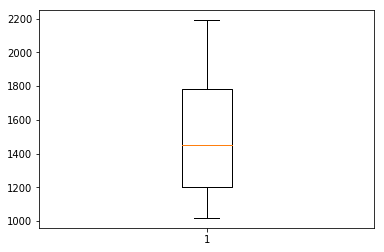

In [70]:
plt.boxplot(House_new.sqft)               # Checking whether outliers is been removed
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

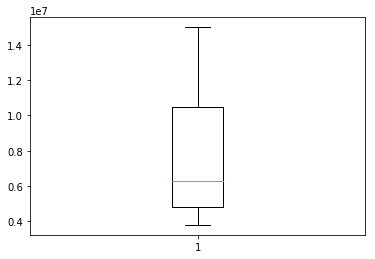

In [71]:
plt.boxplot(House_new.price)                 # Checking whether outliers is been removed
plt.show